# Cars Prediction


In [5]:
! uv pip install plotly


Using Python 3.11.4 environment at: C:\Users\Arwa7\OneDrive\سطح المكتب\Bootcamp\.venv
Audited 1 package in 231ms


In [6]:
! uv pip install scikit-learn


Using Python 3.11.4 environment at: C:\Users\Arwa7\OneDrive\سطح المكتب\Bootcamp\.venv
Audited 1 package in 327ms


In [7]:
! uv pip install pycaret

Using Python 3.11.4 environment at: C:\Users\Arwa7\OneDrive\سطح المكتب\Bootcamp\.venv
Audited 1 package in 3.82s


In [8]:
! uv pip uninstall scikit-learn pycaret


Using Python 3.11.4 environment at: C:\Users\Arwa7\OneDrive\سطح المكتب\Bootcamp\.venv
Uninstalled 2 packages in 1.09s
 - pycaret==3.0.0
 - scikit-learn==1.3.2


In [9]:
! uv pip install scikit-learn==1.3.2 pycaret


Using Python 3.11.4 environment at: C:\Users\Arwa7\OneDrive\سطح المكتب\Bootcamp\.venv
Resolved 100 packages in 3.15s
Installed 2 packages in 729ms
 + pycaret==3.0.0
 + scikit-learn==1.3.2


In [10]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


from pycaret.regression import *


# 2. Data Preparation

In [11]:
! uv pip install kagglehub


Using Python 3.11.4 environment at: C:\Users\Arwa7\OneDrive\سطح المكتب\Bootcamp\.venv
Audited 1 package in 36ms


In [12]:
import kagglehub

path = kagglehub.dataset_download("abdulmalik1518/cars-datasets-2025")


In [13]:
import os

csv_path = os.path.join(path, "Cars Datasets 2025.csv")

df = pd.read_csv(csv_path, encoding="latin1")
df.head()


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [14]:
df.drop(columns=['Torque'], inplace=True)

In [15]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2


In [16]:
df.shape

(1218, 10)

In [17]:
df.describe().T

,count,unique,top,freq
Company Names,1218,37,Nissan,149
Cars Names,1218,1201,Macan T,2
Engines,1218,356,I4,64
CC/Battery Capacity,1215,311,"2,000 cc",31
HorsePower,1218,456,355 hp,23
Total Speed,1218,114,250 km/h,145
Performance(0 - 100 )KM/H,1212,180,6.5 sec,45
Cars Prices,1218,535,"$35,000",36
Fuel Types,1218,23,Petrol,871
Seats,1218,19,5,692


In [18]:
# null check

df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
dtype: int64

In [19]:
# drop null value

df.dropna(inplace=True)

In [20]:
df.shape

(1210, 10)

In [21]:
# Duplicate check

df.duplicated().sum()

4

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(1206, 10)

In [24]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2
...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5


In [25]:
def clean_numeric(column):
    """  clean the col and convrt ot number """
    cleaned = column.astype(str).str.replace(r'[^\d.]', '', regex=True)
    
    cleaned = cleaned.str.replace(r'\.(?=.*\.)', '', regex=True)
    
    cleaned = cleaned.replace('', np.nan)
    
    return pd.to_numeric(cleaned, errors='coerce')

numeric_columns = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 
                   'Performance(0 - 100 )KM/H', 'Cars Prices', 'Seats']

for col in numeric_columns:
    df[col] = clean_numeric(df[col])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1206 non-null   object 
 1   Cars Names                 1206 non-null   object 
 2   Engines                    1206 non-null   object 
 3   CC/Battery Capacity        1204 non-null   float64
 4   HorsePower                 1206 non-null   int64  
 5   Total Speed                1206 non-null   int64  
 6   Performance(0 - 100 )KM/H  1206 non-null   float64
 7   Cars Prices                1206 non-null   int64  
 8   Fuel Types                 1206 non-null   object 
 9   Seats                      1206 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 103.6+ KB
None


In [26]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats
0,FERRARI,SF90 STRADALE,V8,3990.0,963,340,2.5,1100000,plug in hyrbrid,2
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563,250,5.3,460000,Petrol,5
2,Ford,KA+,1.2L Petrol,1200.0,7085,165,10.5,1200015000,Petrol,5
3,MERCEDES,GT 63 S,V8,3982.0,630,250,3.2,161000,Petrol,4
4,AUDI,AUDI R8 Gt,V10,5204.0,602,320,3.6,253290,Petrol,2


In [27]:
# Data Analysis


In [28]:
#Features 
X = df[['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
        'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H',
        'Fuel Types', 'Seats']]


In [29]:
#Target 
target = df['Cars Prices']

In [30]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("categorical_cols :", categorical_cols)
print("numeric_cols :", numeric_cols)

df.head()

categorical_cols : ['Company Names', 'Cars Names', 'Engines', 'Fuel Types']
numeric_cols : ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Seats']


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats
0,FERRARI,SF90 STRADALE,V8,3990.0,963,340,2.5,1100000,plug in hyrbrid,2
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563,250,5.3,460000,Petrol,5
2,Ford,KA+,1.2L Petrol,1200.0,7085,165,10.5,1200015000,Petrol,5
3,MERCEDES,GT 63 S,V8,3982.0,630,250,3.2,161000,Petrol,4
4,AUDI,AUDI R8 Gt,V10,5204.0,602,320,3.6,253290,Petrol,2


In [31]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

scaler = MinMaxScaler()

df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [33]:
import numpy as np
import statsmodels.api as sm
import plotly.express as px

target = "Cars Prices"   # تأكد أنه اسم عمود

for col in numeric_cols:
    if col != target:

        temp_df = df_scaled[[col, target]].dropna()

        X = temp_df[col]
        y = temp_df[target]

        # Correlation
        corr = np.corrcoef(X, y)[0, 1]

        # OLS for R²
        X_ols = sm.add_constant(X)
        model = sm.OLS(y, X_ols).fit()
        r2 = model.rsquared

        # ===== Plot =====
        fig = px.scatter(
            temp_df,
            x=col,
            y=target,
            title=f'{col} vs Price (Scaled)',
            opacity=0.7,
            trendline='ols'
        )

        fig.add_annotation(
            text=f"Correlation: {corr:.2f}<br>R²: {r2:.2f}",
            xref="paper", yref="paper",
            x=0.01, y=0.99,
            showarrow=False,
            font=dict(size=14),
            bgcolor="white"
        )

        fig.update_layout(width=1200, height=600)
        fig.show()

        print("="*50)
        print(f"Feature: {col}")
        print(f"Correlation with Price: {corr:.3f}")
        print(f"R² (OLS): {r2:.3f}")

        if abs(corr) > 0.7:
            print("➡ Strong relationship")
        elif abs(corr) > 0.4:
            print("➡ Moderate relationship")
        else:
            print("➡ Weak relationship")


Feature: CC/Battery Capacity
Correlation with Price: -0.003
R² (OLS): 0.000
➡ Weak relationship


Feature: HorsePower
Correlation with Price: -0.007
R² (OLS): 0.000
➡ Weak relationship


Feature: Total Speed
Correlation with Price: 0.056
R² (OLS): 0.003
➡ Weak relationship


Feature: Performance(0 - 100 )KM/H
Correlation with Price: -0.002
R² (OLS): 0.000
➡ Weak relationship


Feature: Seats
Correlation with Price: -0.014
R² (OLS): 0.000
➡ Weak relationship


In [ ]:


MIN_COUNT = 10  

for col in categorical_cols:
    if col != target:

        grouped = (
            df
            .groupby(col)[target]
            .agg(avg_price='mean', count='count')
            .reset_index()
        )

        grouped = grouped[grouped['count'] >= MIN_COUNT]

        grouped = grouped.sort_values('avg_price', ascending=False)

        fig = px.bar(
            grouped,
            x=col,
            y='avg_price',
            title=f'Average {target} by {col} (n ≥ {MIN_COUNT})',
            text='count',
            color='avg_price',
            color_continuous_scale='Viridis'
        )

        fig.update_layout(
            width=1500,
            height=650,
            font=dict(size=14),
            yaxis_title='Average Price',
            xaxis_title=col
        )

        fig.update_xaxes(
            tickangle=45,
            tickfont=dict(size=12)
        )

        fig.update_traces(
            texttemplate='n=%{text}',
            textposition='outside'
        )

        fig.show()


In [36]:
reg_setup = setup(
    data=df,
    target=target,

    imputation_type="simple",
    numeric_imputation="median",
    categorical_imputation="mode",

    normalize=True,
    transformation=True,

    remove_outliers=True,
    outliers_threshold=0.05,

    session_id=42
)


,Description,Value
0,Session id,42
1,Target,Cars Prices
2,Target type,Regression
3,Original data shape,"(1206, 10)"
4,Transformed data shape,"(1163, 28)"
5,Transformed train set shape,"(801, 28)"
6,Transformed test set shape,"(362, 28)"
7,Numeric features,5
8,Categorical features,4
9,Rows with missing values,0.2%


In [37]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,59185101847.3233,2941178208614488068849664.0000,543214025223.2318,-0.1299,3.2658,8.8672,0.1830
par,Passive Aggressive Regressor,59185178101.1038,2941178289632475881668608.0000,543214801173.4660,-0.1318,3.5554,1.4207,0.2080
dummy,Dummy Regressor,121186709360.8616,2945460352406984000012288.0000,604632685830.5532,-5562.8858,12.5591,1373589.6289,0.2660
br,Bayesian Ridge,121186709360.8616,2945460352406984000012288.0000,604632685830.5532,-5562.8858,12.5591,1373589.6289,0.1870
en,Elastic Net,211560465447.4934,2989699890837400607260672.0000,749468948929.6188,-62648.7435,12.8436,2257396.5301,0.1790
omp,Orthogonal Matching Pursuit,229650991879.4834,3014492465969615433891840.0000,796983761733.5751,-92921.2234,12.5735,2562849.5210,0.1770
ridge,Ridge Regression,277145889216.6740,3037970034122707427131392.0000,834820376746.6277,-122343.1614,13.1491,3463403.8531,0.1760
lasso,Lasso Regression,277738311065.4530,3038382099735939714646016.0000,835459497266.2169,-122908.8342,13.1525,3477958.7171,0.1900
llar,Lasso Least Angle Regression,277555921297.4942,3038646893462216905850880.0000,835795496177.0930,-123283.8719,13.1471,3464554.7166,0.1870
lar,Least Angle Regression,277995404661.6255,3038995915924818767118336.0000,836261068077.3695,-123657.9043,13.1528,3481161.2167,0.2020


In [40]:
print(best_model)


HuberRegressor()


In [41]:
tuned_model = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,343556238.0394,509097983268454976.0000,713511025.3307,0.4336,6.9881,3093.2274
1,363050232.6968,596158688636739840.0000,772113132.0194,0.4291,6.8646,3726.2637
2,588636443539.4965,29411221361088534222471168.0000,5423211351320.2246,-0.0119,6.8799,4097.8765
3,254486293.7226,224295419374407520.0000,473598373.4921,0.6460,7.1593,3311.6903
4,278449570.1614,302483811558766144.0000,549985283.0383,0.5256,6.9569,3102.1860
5,314233776.0110,783674994938815104.0000,885254197.9222,-0.7302,7.0807,3606.2248
6,434671215.4848,526050370667031744.0000,725293299.7533,0.4745,6.7112,5434.2115
7,370495491.2314,481248175055282560.0000,693720530.9455,0.4059,7.2065,6277.6799
8,326300597.1326,304367027361023296.0000,551694686.7254,0.5968,7.3292,5343.7754


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [43]:
final_model = finalize_model(tuned_model)


In [45]:
predictions = predict_model(tuned_model)
predictions.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,196909420562209065620471808.0000,14035941798822252779226224754889037980056456170953506816.0000,3746457233016580722728632320.0000,-18967682660691988251604203421330046976.0000,7.7456,35801359461468856.0000


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Fuel Types,Seats,Cars Prices,prediction_label
102,BMW,M2 CS,I6,2993.0,444,280,4.0,Petrol,4,83000,-2.093897e+08
263,HYUNDAI,Veloster,2.0L Inline-4,2000.0,275,220,6.0,Petrol,4,25000,-1.502230e+08
784,GMC,Yukon XL AT4,5.3L V8 engine,5327.0,355,210,7.3,Petrol,8,73305,7.029738e+07
110,ROLLS ROYCE,GHOST ZENITH,V12,6749.0,563,250,4.9,Petrol,5,335000,3.541915e+08
654,Tata Motors,Aria,2.2L Dicor Diesel,2179.0,138,162,13.0,Diesel,7,19000,-2.233520e+08


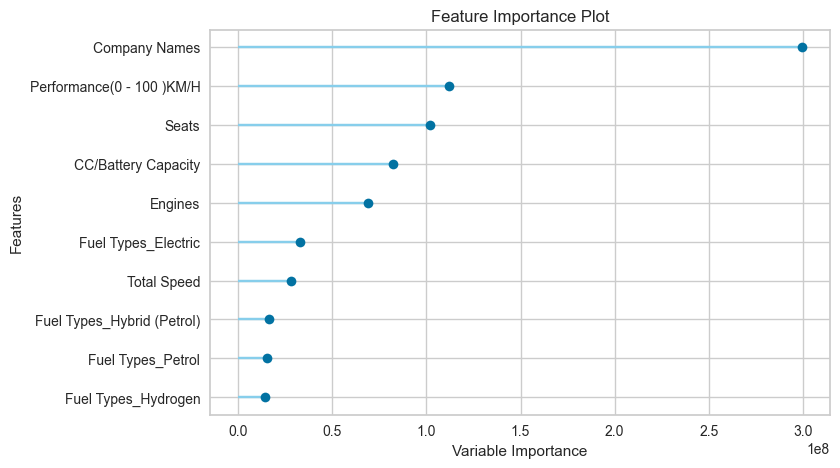

In [46]:
plot_model(final_model, plot="feature")


In [51]:
save_model(final_model, "car_price_model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Arwa7\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CC/Battery Capacity',
                                              'HorsePower', 'Total Speed',
                                              'Performance(0 - 100 )KM/H',
                                              'Seats'],
                                     transformer=SimpleImputer(strategy='median'))),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Company Names', 'Cars Names',
                                              'Engines',...
                  TransformerWrapper(transformer=RemoveOutliers(random_state=42))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
             